# Random shuffle

In [80]:
from random import random as rnd
from random import randrange as rndr
import random

In [14]:
suits = ["♣", "♠", "♥", "♦"]
ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
cards = [f"{rank}{suit}" for suit in suits for rank in ranks]

In [86]:
for index in range(len(cards)-1):
    swap_index = rndr(index+1, len(cards))
    cards[index], cards[swap_index] = cards[swap_index], cards[index]    

In [87]:
print(*cards)

10♣ Q♠ J♦ K♦ 4♦ K♠ 7♥ 8♣ 4♠ J♥ 2♦ 5♠ 4♥ J♣ 2♥ A♣ J♠ 9♣ Q♣ 10♦ 9♦ 2♣ 9♥ 3♥ 8♠ 7♠ 3♦ 6♥ A♦ A♠ 4♣ 10♥ 8♥ 2♠ 9♠ 5♣ K♥ A♥ 3♣ K♣ 6♣ 6♦ 5♥ 6♠ 10♠ 8♦ 3♠ Q♥ 5♦ 7♣ 7♦ Q♦


# Coupon collection

In [47]:
from random import random as rnd
from random import randrange as rndr
import random
import numpy as np

In [44]:
differentCardsNumber = 13
collected = [False] * differentCardsNumber

iterations = 0
while False in collected:
    iterations += 1
    collected[rndr(differentCardsNumber)] = True
iterations

51

But checking for an item in a list is O(N) operation and we can skip it

In [63]:
# Number of Magic the Gathering cards published
def simulateCollector(differentCardsNumber = 12534):
    collected = [False] * differentCardsNumber
    differentCardsFound = 0
    iterations = 0
    
    while differentCardsFound < differentCardsNumber:
        iterations += 1
        found = rndr(differentCardsNumber)
        if collected[found] == False:
            collected[found] = True
            differentCardsFound += 1
    return iterations

simulateCollector()

142945

And theoretical value for this problem by Laplase

In [71]:
m = differentCardsNumber
m * np.log(m) + 0.57721 * m

125508.08383265445

Averaging for several trials gives us more correct estimate

In [68]:
trials = 100
estimates = [simulateCollector() for trial in range(trials)]

In [69]:
np.mean(estimates)

126098.57

In [70]:
sum(estimates) / len(estimates)

126098.57

# Self-avoiding random walks

In [1]:
from random import choice as rnd
from random import shuffle as shuffle

In [2]:
directions = [(-1,0),(+1,0),(0,-1),(0,+1)]

In [3]:
def outOfRange(n, x, y):
    def out(m):
        return (m < 0) | (m >= n)
    return out(x) | out(y)

In [4]:
def dump(matrix):
    n = len(matrix)
    for row in [[int(row[col]) for col in range(n)] for row in matrix]:
        print(*row)

In [5]:
def nextMove(row, col):
    shuffle(directions)
    return [(row + y, col + x) for (y, x) in directions]

In [6]:
def dogEscape(n):
    row, col = n // 2, n // 2
    visited = [[False for col in range(n)] for row in range(n)]
    path = []
    
    while True:
        visited[row][col] = True
        path.append((row,col))
        #dump(visited)

        for r, c in nextMove(row, col):
            if outOfRange(n, r, c): return (True, path)
            if visited[r][c]: continue
            else: break
        else: return (False, path)
        
        row, col = r, c
        
def dogTrial(n, trials):
    runs = [dogEscape(n) for _ in range(trials)]
    traps = sum([1 for (success, _) in runs if not success])
    return 100 * traps / trials

In [7]:
dogEscape(5)

(True, [(2, 2), (2, 3), (3, 3), (4, 3)])

In [8]:
dogTrial(10, 10000)

9.36

### Plot curve for number of trials

In [9]:
trials = 10000

In [10]:
n = list(range(0,100, 10))
n[0:3] = list(range(1,30, 3))

In [11]:
n

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 30, 40, 50, 60, 70, 80, 90]

In [12]:
y = [dogTrial(i, trials) for i in n]

In [13]:
y

[0.0,
 0.3,
 3.45,
 9.18,
 17.11,
 26.74,
 35.29,
 44.14,
 51.04,
 59.44,
 63.98,
 79.78,
 88.81,
 94.44,
 97.17,
 98.26,
 99.25]

In [14]:
!pip install plotly

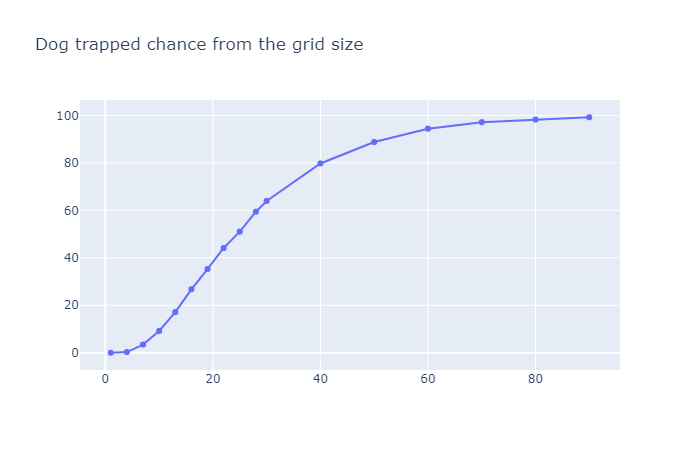

In [15]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Scatter(x = n, y = y)],
    layout_title_text="Dog trapped chance from the grid size"
)
fig.show(renderer="png")

In [30]:
go.Figure?

In [80]:
go.layout.XAxis?

### Plot 2d routes

If png render is used it ignores width and height layout options and thus needs to be customized explicitly

In [19]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 340
png_renderer.height = 340
pio.renderers.default = "png"

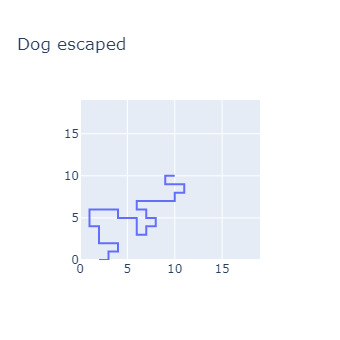

In [20]:
import plotly.graph_objects as go
from plotly.graph_objects import Figure as figure
from plotly.graph_objects import Scatter as scatter

n = 20 
ex = dogEscape(n)
(escape, path) = ex
x, y = zip(*path)

fig = figure(
    data = scatter(x = x, y = y),
    layout = {
        #"width": 340, 
        #"height": 340,
        "title": {"text": "Dog " + ("escaped" if escape else "trapped")},
        "xaxis": {"range": [0, n-1]},
        "yaxis": {"range": [0, n-1]},
    },
)
fig.show()

In [78]:
zip?